## package pandas
##### based on https://www.dataquest.io/blog/pandas-python-tutorial/

In [2]:
import subprocess
import sys
reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]

import sys

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#  pandas
if  not 'pandas' in installed_packages:
  !pip install pandas

In [4]:
import pandas as pd
print("Pandas version: ",pd.__version__)

Pandas version:  0.23.4


Importing Data with Pandas

In [5]:
!wget https://www.dataquest.io/wp-content/uploads/2019/09/ign.csv -O ign.csv

--2020-03-07 15:50:45--  https://www.dataquest.io/wp-content/uploads/2019/09/ign.csv
Resolving webproxy (webproxy)... 10.36.35.1
Connecting to webproxy (webproxy)|10.36.35.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘ign.csv’

ign.csv                 [                <=> ]   1.93M   586KB/s    in 3.4s    

2020-03-07 15:50:49 (586 KB/s) - ‘ign.csv’ saved [2019628]



In [6]:
reviews = pd.read_csv("ign.csv")

In [7]:
reviews.shape

(18625, 11)

In [8]:
reviews.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [10]:
reviews.dtypes

Unnamed: 0          int64
score_phrase       object
title              object
url                object
platform           object
score             float64
genre              object
editors_choice     object
release_year        int64
release_month       int64
release_day         int64
dtype: object

### Meaning of data in columns
score_phrase — how IGN described the game in one word. This is linked to the score it received.

title — the name of the game.

url — the URL where you can see the full review.

platform — the platform the game was reviewed on (PC, PS4, etc).
score — the score for the game, from 1.0 to 10.0.

genre — the genre of the game.

editors_choice — N if the game wasn’t an editor’s choice, Y if it was. This is tied to score.

release_year — the year the game was released.

release_month — the month the game was released.

release_day — the day the game was released.


 Once we read in a DataFrame, it’s helpful to take a look at what we’ve got in a more visual way. Conveniently, Pandas gives us two methods that make it fast to print out the data a table. These functions are:

    DataFrame.head() — prints the first N rows of a DataFrame, where N is a number you pass as an argument to the function, i.e. DataFrame.head(7). If you don’t pass any argument, the default is 5.
    DataFrame.tail() — prints the last N rows of a DataFrame. Again, the default is 5.

We’ll use the head method to see what’s in reviews: 

In [9]:
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


### Indexing DataFrames with Pandas

Earlier, we used the head method to print the first 5 rows of reviews. We could accomplish the same thing using the pandas.DataFrame.iloc method. The iloc method allows us to retrieve rows and columns by position. In order to do that, we’ll need to specify the positions of the rows that we want, and the positions of the columns that we want as well. The below code will replicate the results of our reviews.head() by selecting rows zero to five, and all of the columns in our data set: 

In [11]:
reviews.iloc[0:5,:]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Let’s dig in a little deeper into our code: we specified that we wanted rows 0:5. This means that we wanted the rows from position 0 up to, but not including, position 5.

The first row is considered to be in position 0, so selecting rows 0:5 gives us the rows at positions 0, 1, 2, 3, and 4. We wanted all of the columns, too, and we used a shortcut to select them. It works like this: if we leave off the first position value, like :5, it’s assumed we mean 0. If we leave off the last position value, like 0:, it’s assumed we mean the last row or column in the DataFrame. We wanted all of the columns, so we specified just a colon (:), without any positions. This gave us the columns from 0 to the last column. Here are some indexing examples, along with the results:

    reviews.iloc[:5,:] — the first 5 rows, and all of the columns for those rows.
    reviews.iloc[:,:] — the entire DataFrame.
    reviews.iloc[5:,5:] — rows from position 5 onwards, and columns from position 5 onwards.
    reviews.iloc[:,0] — the first column, and all of the rows for the column.
    reviews.iloc[9,:] — the 10th row, and all of the columns for that row.

Indexing by position is very similar to NumPy indexing. If you want to learn more, you can read our NumPy tutorial. Now that we know how to index by position, let’s remove the first column, which doesn’t have any useful information: 

In [13]:
reviews = reviews.iloc[:,1:]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


### Indexing Using Labels in Python with Pandas

Now that we know how to retrieve rows and columns by position, it’s worth looking into the other major way to work with DataFrames, which is to retrieve rows and columns by label. A major advantage of Pandas over NumPy is that each of the columns and rows has a label. Working with column positions is possible, but it can be hard to keep track of which number corresponds to which column.

We can work with labels using the pandas.DataFrame.loc method, which allows us to index using labels instead of positions. We can display the first five rows of reviews using the loc method like this: 

In [14]:
reviews.loc[0:5,:]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11


The above doesn’t actually look much different from reviews.iloc[0:5,:]. This is because while row labels can take on any values, our row labels match the positions exactly. You can see the row labels on the very left of the table above (they’re in bold). You can also see them by accessing the index property of a DataFrame. We’ll display the row indexes for reviews: 

In [15]:
reviews.index

RangeIndex(start=0, stop=18625, step=1)

Indexes don’t always have to match up with positions, though. In the below code cell, we’ll:
Get row 10 to row 20 of reviews, and assign the result to some_reviews.
Display the first 5 rows of some_reviews.


In [16]:
some_reviews = reviews.iloc[10:20,]
some_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


As you can see above, in some_reviews, the row indexes start at 10 and end at 20. Thus, trying loc along with numbers lower than 10 or higher than 20 will result in an error: 

In [21]:
some_reviews.loc[9:21,:]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
16,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/pc-137135,PC,6.5,Adventure,N,2012,9,6
17,Great,Avengers Initiative,/games/avengers-initiative/iphone-141579,iPhone,8.0,Action,N,2012,9,5
18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3
19,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/xbox-360-137717,Xbox 360,7.0,Fighting,N,2012,9,3


As we mentioned earlier, column labels can make life much easier when you’re working with data. We can specify column labels in the loc method to retrieve columns by label instead of by position. 

In [22]:
reviews.loc[:5,"score"]

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

We can also specify more than one column at a time by passing in a list: 

In [23]:
reviews.loc[:5,["score", "release_year"]]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012


### Pandas Series Objects

We can retrieve an individual column in Pandas a few different ways. So far, we’ve seen two types of syntax for this:

    reviews.iloc[:,1] — will retrieve the second column.
    reviews.loc[:,"score_phrase"] — will also retrieve the second column.

There’s a third, even easier, way to retrieve a whole column. We can just specify the column name in square brackets, like with a dictionary: 

In [24]:
reviews["score"]

0         9.0
1         9.0
2         8.5
3         8.5
4         8.5
5         7.0
6         3.0
7         9.0
8         3.0
9         7.0
10        7.5
11        7.5
12        7.0
13        9.0
14        9.0
15        6.5
16        6.5
17        8.0
18        5.5
19        7.0
20        7.0
21        7.5
22        7.5
23        7.5
24        9.0
25        7.0
26        9.0
27        7.5
28        8.0
29        6.5
         ... 
18595     4.4
18596     6.5
18597     4.9
18598     6.8
18599     7.0
18600     7.4
18601     7.4
18602     7.4
18603     7.8
18604     8.6
18605     6.0
18606     6.4
18607     7.0
18608     5.4
18609     8.0
18610     6.0
18611     5.8
18612     7.8
18613     8.0
18614     9.2
18615     9.2
18616     7.5
18617     8.4
18618     9.1
18619     7.9
18620     7.6
18621     9.0
18622     5.8
18623    10.0
18624    10.0
Name: score, Length: 18625, dtype: float64

We can also use lists of columns with this method: 

In [25]:
reviews[["score", "release_year"]]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012
6,3.0,2012
7,9.0,2012
8,3.0,2012
9,7.0,2012


 When we retrieve a single column, we’re actually retrieving a Pandas Series object. A DataFrame stores tabular data, but a Series stores a single column or row of data.

We can verify that a single column is a Series: 

In [27]:
type(reviews["score"])

pandas.core.series.Series

We can create a Series manually to better understand how it works. To create a Series, we pass a list or NumPy array into the Series object when we instantiate it: 

In [28]:
s1 = pd.Series([1,2])
s1

0    1
1    2
dtype: int64

A Series can contain any type of data, including mixed types. Here, we create a Series that contains string objects: 

In [31]:
s2 = pd.Series(["Boris Yeltsin", "Mikhail Gorbachev"])
s2

0        Boris Yeltsin
1    Mikhail Gorbachev
dtype: object

### Creating A DataFrame in Pandas

We can create a DataFrame by passing multiple Series into the DataFrame class. Here, we pass in the two Series objects we just created,

s1 as the first row, and s2 as the second row: 

In [32]:
pd.DataFrame([s1,s2])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


We can also accomplish the same thing with a list of lists. Each inner list is treated as a row in the resulting DataFrame: 

In [33]:
pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
    ]
)

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


We can specify the column labels when we create a DataFrame: 

In [34]:
pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    columns=["column1", "column2"]
)

,column1,column2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


As well as the row labels (the index): 

In [35]:
frame = pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["row1", "row2"],
    columns=["column1", "column2"]
)
frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


Note also that the indentation and separate lines are not required. We’ve written the code this way to make it a bit easier to parse, but you’ll often encounter it all written as one line. For example, the following code will produce the exact same results as what we see in the table above this paragraph: 

In [37]:
frame = pd.DataFrame([[1,2],["Boris Yeltsin", "Mikhail Gorbachev"]],index=["row1", "row2"],columns=["column1", "column2"])
frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


Anyway, once we’ve added labels, we’re then able index the DataFrame using them: 

In [38]:
frame.loc["row1":"row2", "column1"]

row1                1
row2    Boris Yeltsin
Name: column1, dtype: object

We can skip specifying the columns keyword argument if we pass a dictionary into the DataFrame constructor. This will automatically set up column names: 

In [39]:
frame = pd.DataFrame(
    {
    "column1": [1, "Boris Yeltsin"],
    "column2": [2, "Mikhail Gorbachev"]
    }
)
frame

,column1,column2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


### Pandas DataFrame Methods

As we mentioned earlier, each column in a pandas DataFrame is a Series object: 

In [40]:
type(reviews["title"])

pandas.core.series.Series

We can call most of the same methods on a Series object that we can on a DataFrame, including head: 

In [41]:
reviews["title"].head()

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
Name: title, dtype: object

Pandas Series and DataFrames also have other methods that make calculations simpler. For example, we can use the pandas.Series.mean method to find the mean of a Series: 

In [42]:
reviews["score"].mean()

6.950459060402666

We can also call the similar pandas.DataFrame.mean method, which will find the mean of each numerical column in a DataFrame by default: 

In [43]:
reviews.mean()

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

We can modify the axis keyword argument to mean in order to compute the mean of each row or of each column. By default, axis is equal to 0, and will compute the mean of each column. We can also set it to 1 to compute the mean of each row. Note that this will only compute the mean of the numerical values in each row: 

In [44]:
reviews.mean(axis=1)

0        510.500
1        510.500
2        510.375
3        510.125
4        510.125
5        509.750
6        508.750
7        510.250
8        508.750
9        509.750
10       509.875
11       509.875
12       509.500
13       509.250
14       509.250
15       508.375
16       508.375
17       508.500
18       507.375
19       507.750
20       507.750
21       514.625
22       514.625
23       514.625
24       515.000
25       514.250
26       514.750
27       514.125
28       514.250
29       513.625
          ...   
18595    510.850
18596    510.875
18597    510.225
18598    510.700
18599    510.750
18600    512.600
18601    512.600
18602    512.600
18603    512.450
18604    512.400
18605    511.500
18606    508.600
18607    510.750
18608    510.350
18609    510.750
18610    510.250
18611    508.700
18612    509.200
18613    508.000
18614    515.050
18615    515.050
18616    508.375
18617    508.600
18618    515.025
18619    514.725
18620    514.650
18621    515.000
18622    513.9

 There are quite a few methods on Series and DataFrames that behave like mean. Here are some handy ones:

    pandas.DataFrame.corr — finds the correlation between columns in a DataFrame.
    pandas.DataFrame.count — counts the number of non-null values in each DataFrame column.
    pandas.DataFrame.max — finds the highest value in each column.
    pandas.DataFrame.min — finds the lowest value in each column.
    pandas.DataFrame.median — finds the median of each column.
    pandas.DataFrame.std — finds the standard deviation of each column.

For example, we can use the corr method to see if any columns correlate with score. This would tell us if games released more recently have been getting higher reviews (release_year), or if games released towards the end of the year score better (release_month): 

In [45]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


 As we can see above, none of our numeric columns correlate with score, so we know that release timing doesn’t linearly relate to review score.

### DataFrame Math with Pandas

We can also perform math operations on Series or DataFrame objects in Python with pandas. For example, we can divide every value in the score column by 2 to switch the scale from 0–10 to 0–5: 

In [46]:
reviews["score"] / 2

0        4.50
1        4.50
2        4.25
3        4.25
4        4.25
5        3.50
6        1.50
7        4.50
8        1.50
9        3.50
10       3.75
11       3.75
12       3.50
13       4.50
14       4.50
15       3.25
16       3.25
17       4.00
18       2.75
19       3.50
20       3.50
21       3.75
22       3.75
23       3.75
24       4.50
25       3.50
26       4.50
27       3.75
28       4.00
29       3.25
         ... 
18595    2.20
18596    3.25
18597    2.45
18598    3.40
18599    3.50
18600    3.70
18601    3.70
18602    3.70
18603    3.90
18604    4.30
18605    3.00
18606    3.20
18607    3.50
18608    2.70
18609    4.00
18610    3.00
18611    2.90
18612    3.90
18613    4.00
18614    4.60
18615    4.60
18616    3.75
18617    4.20
18618    4.55
18619    3.95
18620    3.80
18621    4.50
18622    2.90
18623    5.00
18624    5.00
Name: score, Length: 18625, dtype: float64

All the common mathematical operators that work in Python, like +, -, *, /, and ^ 
will work in pandas on Series or DataFrames, and will apply to each element in a DataFrame or a Series. 

### Boolean Indexing in Pandas

Now that we’ve gotten a bit of the pandas basics down, let’s move towards the meat of our analysis. We saw earlier that the mean of all the values in the score column of reviews is around 7. What if we wanted to find all the games that got an above-average score?

We could start by doing a comparison. The comparison compares each value in a Series to a specified value, then generate a Series full of Boolean values indicating the status of the comparison. For example, we can see which of the rows have a score value higher than 7

In [47]:
score_filter = reviews["score"] > 7
score_filter

0         True
1         True
2         True
3         True
4         True
5        False
6        False
7         True
8        False
9        False
10        True
11        True
12       False
13        True
14        True
15       False
16       False
17        True
18       False
19       False
20       False
21        True
22        True
23        True
24        True
25       False
26        True
27        True
28        True
29       False
         ...  
18595    False
18596    False
18597    False
18598    False
18599    False
18600     True
18601     True
18602     True
18603     True
18604     True
18605    False
18606    False
18607    False
18608    False
18609     True
18610    False
18611    False
18612     True
18613     True
18614     True
18615     True
18616     True
18617     True
18618     True
18619     True
18620     True
18621     True
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

Once we have a Boolean Series, we can use it to select only rows in a DataFrame where the Series contains the value True. So, we could only select rows in reviews where score is greater than 7: 

In [48]:
filtered_reviews = reviews[score_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


It’s possible to use multiple conditions for filtering. Let’s say we want to find games released for the Xbox One that have a score of more than 7. In the below code, we:

    Setup a filter with two conditions:

        Check if score is greater than 7.
        Check if platform equals Xbox One
    Apply the filter to reviews to get only the rows we want.
    Use the head method to print the first 5 rows of filtered_reviews.


In [49]:
xbox_one_filter = (reviews["score"] > 7) & (reviews["platform"] == "Xbox One")
filtered_reviews = reviews[xbox_one_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


When filtering with multiple conditions, it’s important to put each condition in parentheses, and separate them with a single ampersand (&). 

### Pandas Plotting

Now that we know how to filter, we can create plots to observe the review distribution for the Xbox One vs the review distribution for the PlayStation 4. This will help us figure out which console has better games.

We can do this via a histogram, which will plot the frequencies for different score ranges. We can make a histogram for each console using the pandas.DataFrame.plot method. This method utilizes matplotlib, the popular Python plotting library, under the hood, to generate good-looking plots.

The plot method defaults to drawing a line graph. We’ll need to pass in the keyword argument kind="hist" to draw a histogram instead. In the below code, we:

    Call %matplotlib inline to set up plotting inside a Jupyter notebook.
    Filter reviews to only have data about the Xbox One.
    Plot the score column.


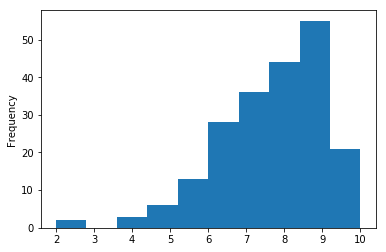

In [52]:
reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind="hist")

We can also do the same for the PS4: 

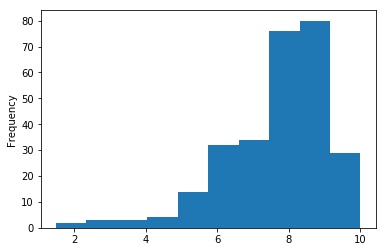

In [51]:
reviews[reviews["platform"] == "PlayStation 4"]["score"].plot(kind="hist")

It appears from our histogram that the PlayStation 4 has many more highly rated games than the Xbox One.

Obviously, this is just the tip of the iceberg when it comes to the potential directions we could take analyzing this data set, but we’re already off to a great start: we’ve imported a data set using Python and pandas, learned to select the data points we want using a variety of different indexing methods, and done some quick exploratory data analysis to answer the question we started with. 

### Free Pandas Cheat Sheet

If you’re interested in learning more about pandas, check out our interactive course on NumPy and pandas. You can register and do the first missions for free. You also might like to take your pandas skills to the next level with our free pandas cheat sheet! 

https://s3.amazonaws.com/dq-blog-files/pandas-cheat-sheet.pdf